In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

IMG_SIZE = 28
LR = 1e-3

/home/ashish/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
y_test[0]

7

In [3]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
X_train.shape

(60000, 28, 28)

In [11]:
X_training = X_train.reshape(X_train.shape[0], IMG_SIZE, IMG_SIZE, 1)
X_testing = X_test.reshape(X_test.shape[0], IMG_SIZE, IMG_SIZE, 1)

In [13]:
X_testing.shape

(10000, 28, 28, 1)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers import SimpleRNN
from keras import initializers
from keras.optimizers import RMSprop
from keras.models import load_model
from keras import regularizers

In [18]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [35]:
def predict(filename, model):
#     path = os.path.join(TEST_DIR, filename)
    img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = np.array(img)
    data = img.reshape(-1, IMG_SIZE,IMG_SIZE,1)
    out = model.predict(data)
    res = np.argmax(out)
    return res

In [20]:
cnn = get_model()
history = cnn.fit(X_training, y_train, epochs=5, verbose = 1, validation_data=(X_testing, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                40970     
Total params: 59,786
Trainable params: 59,786
Non-trainable params: 0
_________________________________________________________________
None
T

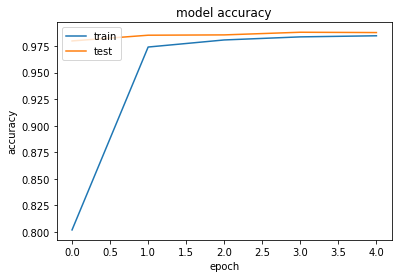

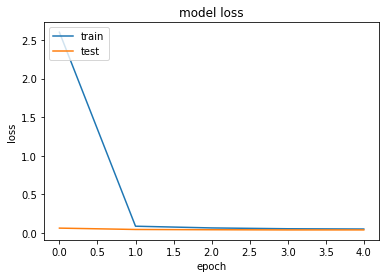

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("cnn_accuracy_table_epoch500_wrong_pros.jpg")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("cnn_loss_table_epoch500_wrong_pros.jpg")
plt.show()

In [44]:
print(predict('1.png', m))

8


In [40]:
cnn.save("mnist_cnn.h5")

In [41]:
m = load_model("mnist_cnn.h5")

In [ ]:
# import os
# ctr_cat = 0
# ctr_dog = 0

# # for i in range(1, len(os.listdir(TEST_DIR))):
# for i in range(1, 100):
#     o = predict(str(i) + '.jpg', m)
# #     print(o)
#     if o == 'Cat':
#         ctr_cat += 1
#     else:
#         ctr_dog += 1
        
# print("ctr_cat, ctr_dog", ctr_cat, ctr_dog)